**<h1>Tarea2: Movimiento de un sólido</h1>**
<h2>Movimiento relativo de un cuerpo en la superficie de la Tierra</h2>

**Integrantes:**
1. Jerónimo López Gómez C.C. 1001.735.3334
2. Valentina Lobo Ruiz C.C. 1067912559

**<h2>Planteamiento del Problema</h2>**
Desde la física se ha planteado la existencia de 4 fuerzas fundamentales en nuestro universo. Estás son la fuerza gravitacional, la fuerza electromágnetica, la fuerza fuerte y la fuerza débil. Sin embargo, cuando se analiza el movimiento de un cuerpo sólido desde un sistema de referencia no inercial se pueden apreciar unas fuerzas ficticias debidas a la inercia: **Fuerza centrifuga** y **Efecto Coriolis**. En el presente trabajo exploraremos las ecuaciones que describen el movimiento relativo de un cuerpo sobre la superficie de la Tierra la superficie de la Tierra.

**<h2>Marco Teórico</h2>**

$$m\frac{d^{2}\vec{r} }{\mathrm{d} t^2} = -\frac{\partial U }{\partial \vec{r}} + 2m \frac{d\vec{r} }{\mathrm{d} t} \times\vec{\Omega }  +m\vec{\Omega }\times(\vec{\Omega } \times \vec{r})$$

**<h2>Desarrollo de solución</h2>**

In [1]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [15]:
#Solucionese el sistema diferencial para el movimiento de la esfera

#Parametros iniciales del sistema fisico correspondientemente
#R Radio Terrestre

def dynamic_sys(t, state, g, m,omega, R):
    #P = list(params.values())

    x, y, z, vel_x, vel_y, vel_z = state

    v = np.sqrt(vel_x**2+vel_y**2+vel_z**2)   #Magnitud de la Velocidad

    x_dtdt =  g*x/R + 2*omega*vel_y + omega**2 * x #Ecuacion de Movimiento para x

    y_dtdt = g*y/R -2*omega*vel_x + omega**2 * y  #Ecuacion de Movimiento para y

    z_dtdt = - g*z/R                        #Ecuacion de Movimiento para z

    return [vel_x, vel_y, vel_z, x_dtdt, y_dtdt, z_dtdt]

In [16]:
def RK4(t, state, dt, g, m, omega, R):

    K1 = dynamic_sys(t, state, g, m, omega, R)
    K2 = dynamic_sys(t + 0.5*dt, [s+0.5*dt*k for s,k in zip(state, K1)], g, m, omega, R)
    K3 = dynamic_sys(t + 0.5*dt, [s+0.5*dt*k for s,k in zip(state, K2)], g, m, omega, R)
    K4 = dynamic_sys(t + dt, [s+dt*k for s,k in zip(state, K3)], g, m, omega, R)

    K = [s + dt/6 * (k1_i + 2*k2_i + 2*k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, K1, K2, K3, K4)]

    return K

In [30]:
def motion(state_0, g, m,omega, R):

    #state0 --> condiciones iniciales del movimiento [x_0, y_0, z_0, v0, ang_polar, ang_azimutal]
    #state_0= list(state0.values())

    theta = np.radians(state_0[4])
    phi = np.radians(state_0[5])
    vx0 = state_0[3] * np.sin(theta) * np.cos(phi)
    vy0 = state_0[3] * np.sin(theta) * np.sin(phi)
    vz0 = state_0[3] * np.cos(theta)
    state = [state_0[0], state_0[1], state_0[2], vx0, vy0, vz0]  #Condiciones iniciales del Movimiento
    dt = 0.01
    times = [0]
    x_values = [state_0[0]]
    y_values = [state_0[1]]
    z_values = [state_0[2]]

    i = 0

    while i<1000:                        #Modulador de iteraciones
        t = times[-1]
        state = RK4(t, state, dt, g, m, omega, R)
        times.append(t + dt)
        x_values.append(state[0])
        y_values.append(state[1])
        z_values.append(state[2])

        i +=1

    tiempo_de_vuelo = times[-1]

    return tiempo_de_vuelo, times, x_values, y_values, z_values



In [70]:
polar, azim = 45, 10
R = 6
x_0, y_0, z_0 = R*np.sin(np.radians(polar))*np.cos(np.radians(azim)), R*np.sin(np.radians(polar))*np.sin(np.radians(azim)), R*np.cos(np.radians(polar))

omega_C4 = 7e-5

m = 1
g = 9.8
state0_C4 = list({'x_0':x_0, 'y_0':y_0, 'z_0':z_0, 'v0':120, 'ang_polar':polar, 'ang_azim':azim}.values())

t_total_C4, times_C4, X_C4, Y_C4, Z_C4 = motion(state0_C4, g, m, omega_C4, R)

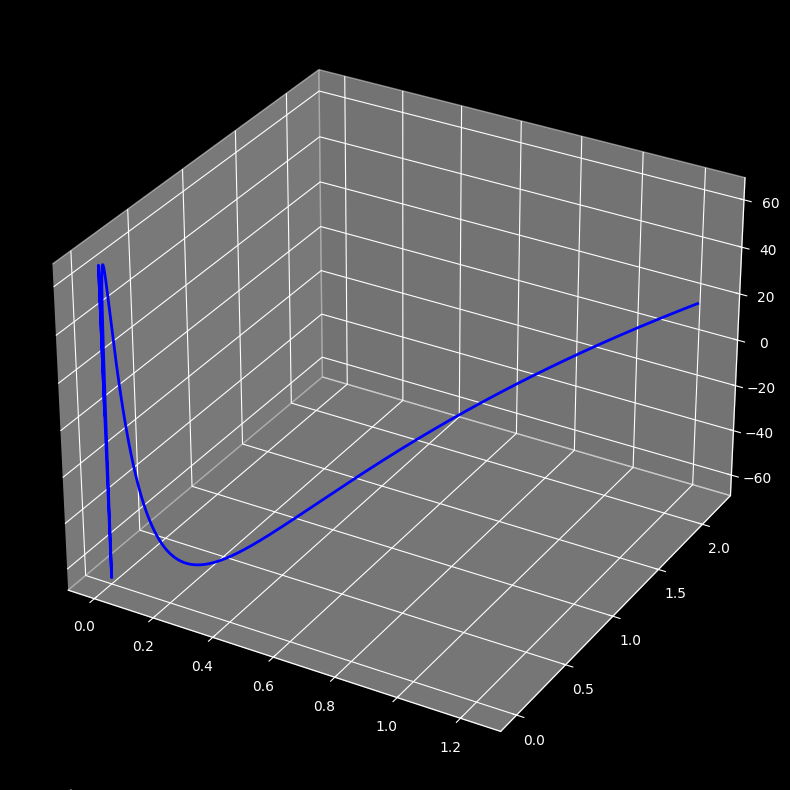

In [71]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.plot(X_C4, Y_C4, Z_C4, c = 'b', linewidth = 2, label = '$\\vec{\omega}$ = (0, 10, -2)')
#plt.lim(0, 100)

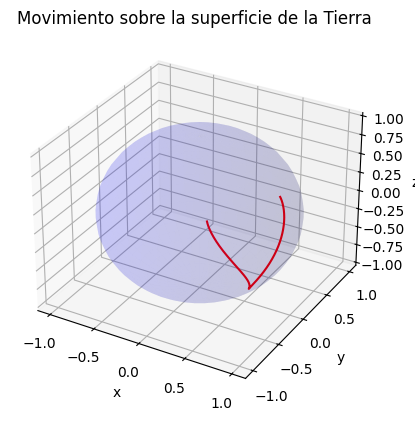

In [125]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constantes
R =   1 # Radio de la Tierra
W = 1  # Velocidad angular de rotación

# Ecuación diferencial para el movimiento del proyectil
def projectile_motion(x, t):
    theta, dtheta_dt, phi, dphi_dt = x
    dxdt = [dtheta_dt,
            np.sin(theta) * np.cos(theta) * (dphi_dt**2 + 2 * W * dphi_dt + W**2),
            dphi_dt,
            -2 * np.cos(theta) * (W * dtheta_dt + dtheta_dt * dphi_dt) / np.sin(theta)]
    return dxdt

# Condiciones iniciales y tiempo de integración
x0 = [np.pi/3, 0, 0, 0]  # [theta, dtheta_dt, phi, dphi_dt]
t = np.linspace(0, 7, 1000)

# Integra la ecuación diferencial
x = odeint(projectile_motion, x0, t)

# Calcula las coordenadas de la trayectoria
xp = R * np.sin(x[:, 0]) * np.cos(x[:, 2])
yp = R * np.sin(x[:, 0]) * np.sin(x[:, 2])
zp = R * np.cos(x[:, 0])

# Grafica la esfera de la Tierra
phi = np.linspace(0, np.pi, 30)
theta = np.linspace(0, 2 * np.pi, 40)
phi, theta = np.meshgrid(phi, theta)
x_sphere = R * np.sin(phi) * np.cos(theta)
y_sphere = R * np.sin(phi) * np.sin(theta)
z_sphere = R * np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.1)

# Grafica la trayectoria del proyectil
ax.plot(xp, yp, zp, color='r', linewidth=1.5)
# Configuración del gráfico
#ax.view_init(130, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Movimiento sobre la superficie de la Tierra')

plt.show()

________

Los efectos debidos a la rotación terrestre son fenómenos que aunque sean imperceptible a nuestros sentidos, se encuentra presente debido a la leve velocidad angular de rotación terrestre, que se encuentra por el orden de $\Omega = 7.29 \cdot 10^{-5}$**[rad/s]**. La fuerza de Coriolis y la ficticia fuerza centrifuga, son experimentadas por todos los cuerpos en la superficie terrestre, efectos que logramos evidenciar en ejemplos concretos como la variación del plano de oscilación en un pendulo de Foucault, la rotación de los vórtices de tormentas tropicales como el sentido del giro del agua en el inodoro. Es de agregar tambien que debemos experimentar efectos denbidos a la traslación terrestre respecto al Sol, pero estos serán despreciados en el presente estudio ya que solo se enfocará el movimiento rotacional de nuestro planeta.

De acuerdo a la teoría, el movimiento que describe un cuerpo respecto a un sistema de referencia no inercial, como es en este caso el planeta tierra debido a su rotación que se asume completamente uniforme, debe tener presentes las contribuciones de 2 fuerzas, la debida al efecto de Coriolis y la Fuerza centrifuga, lo cuál se expresa de acuerdo a la teoría **[CITA LANDAU]** en el siguiente modelo diferencial descartando otras contribuciones que no serán objeto de estudio:

$$m\frac{d^{2}\vec{r} }{\mathrm{d} t^2} = -\frac{\partial U }{\partial \vec{r}} + 2m \frac{d\vec{r} }{\mathrm{d} t} \times\vec{\Omega }  +m\vec{\Omega }\times(\vec{\Omega } \times \vec{r})$$

Donde $2m \frac{d\vec{r} }{\mathrm{d} t} \times\vec{\Omega}$ es la fuerza de Coriolis y $m\vec{\Omega }\times(\vec{\Omega } \times \vec{r})$ la fuerza centrifuga experimentada por el cuerpo, finalmente la dinámica de un cuerpo en la tierra se expresa como se sigue, en función de $\vec{r}_{(x,y,z)}$:

$$m \ddot x = -m{g_x} + 2m\dot y \Omega_z - m\Omega_z^2 x$$
$$m \ddot y= -m{g_y} - 2m\dot x \Omega_z - m\Omega_z^2 y$$
$$m \ddot z = -m{g_z} + m\Omega_z^2 |\vec{r}|\cos{\theta} - m\Omega_z^2 z$$

nota: Aplicando $A \times (B \times C) = (A \cdot C)B - (A \cdot B)C$

Realizando la tranasformación de coordenadas de la anterior expresión a coordenadas esféricas, podemos expresar el movimiento de un cuerpo en función de 2 ángulos ($\theta$, $\phi$) polar y azimutal correspondientemente, que pueden describir la pocisión de un cuerpo respecto al centro terrestre. Se aplica la siguiente regla de transformación ampliamente ya conocida:

$$ x = R_T \sin{\theta}\cos{\phi} \rightarrow \dot x \rightarrow \ddot x$$
$$ y = R_T \sin{\theta}\sin{\phi} \rightarrow \dot y \rightarrow \ddot y$$
$$ z = R_T \cos{\theta} \rightarrow \dot z \rightarrow \ddot z$$



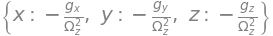

In [120]:
import sympy as sp
from sympy import init_printing
init_printing() 

R_T, t, m, gx, gy, gz, Omz = sp.symbols('R_T, t, m, g_x, g_y, g_z, Omega_z')


theta_ang, phi_ang = sp.Function('theta')(t), sp.Function('phi')(t)
ddot_theta, ddot_phi = sp.diff(theta_ang,t,2), sp.diff(phi_ang,t,2)

x,y,z = sp.Function('x')(t), sp.Function('y')(t), sp.Function('z')(t)

#Componentes Cartesianas ecuación de movimiento
eqx = sp.Eq(sp.diff(x,t,2), -gx*x + 2*sp.diff(y,t)*Omz - Omz**2*x)                                  
eqy = sp.Eq(sp.diff(y,t,2), -gy*y - 2*sp.diff(x,t)*Omz - Omz**2*y)
eqz = sp.Eq(sp.diff(z,t,2), -gz*z - Omz**2*z)

#Relaciones de Transformación
#X, Y, Z = R_T*sp.sin(theta_ang)*sp.cos(phi_ang),  R_T*sp.sin(theta_ang)*sp.sin(phi_ang),  R_T*sp.cos(theta_ang)

#Igualando Ecuaciones

#eqx = sp.Eq(m*sp.diff(x,t,2), m*x_ddot)
#eqy = sp.Eq(m*sp.diff(y,t,2), m*y_ddot)
#eqz = sp.Eq(m*sp.diff(z,t,2), m*z_ddot)


sp.solve([eqx,eqy,eqz], [x,y,z])



ValueError: 
Can't calculate derivative wrt 0.0.

In [139]:
#Modelo diferencial de la dinámica del sólido respecto a la tierra como sistema no inercial
def body_motion(var, t, omegaT):
    theta, theta2, phi, phi2 = var
    dtheta_dt, dphi_dt = theta2, phi2

    dtheta2_dt = np.sin(theta) * np.cos(theta) * ((phi2)**2 + 2*omegaT*phi2 + omegaT**2)
    dphi2_dt = -2*np.cos(theta)/np.sin(theta) * (omegaT*theta2 + theta2*phi2)

    return [dtheta_dt, dtheta2_dt, dphi_dt, dphi2_dt]


#Función Conjunta    

def non_inertial_mot(init_params, t_samples, t_final, RT = 6378137.0, omegaT = 7.29211e-5, coords=False):

    """
    Soluciona la trayectoria de un cuerpo respecto al sistema no inercial (Tierra), entregando las coordenadas
    correspondientes

    init_params : [theta_0[rad], veltheta_0[rad/s], phi_0[rad], velphi_0[rad/s]]
    t_samples   : Muestreo temporal
    t_final     : duración del invervalo temporal [s] para el desarrollo del movimiento
    RT          : Radio Terrestre [m] (Defecto:6378137.0)
    omegaT      : Velocidad angular constante de la tierra [rad/s] (defecto: 7.29211e-5)
    coords      : (Defecto: False) Si coords=True, retorna coords

    return: coordenadas = {time, theta, veltheta, phi, velphi, X, Y, Z}
    """

    #Intervalo temporal en el que transcurre el movimiento

    t = np.linspace(0, t_final, t_samples)
    
    solve = odeint(body_motion, init_params, t, args=(omegaT,))    #Soluciones numericas por scipy.integrate.odeint
    theta_s, veltheta_s = solve[:,0], solve[:,1]
    phi_s, velphi_s = solve[:,2], solve[:,3]

    #Coordenadas Cartesianas del Movimiento

    X = R * np.sin(theta_s) * np.cos(phi_s)
    Y = R * np.sin(theta_s) * np.sin(phi_s)
    Z = R * np.cos(theta_s)

    coordenadas = {
        "t"         : t,
        "theta"     : theta_s,
        "vel_theta" : veltheta_s,
        "phi"       : phi_s,
        "vel_phi"   : velphi_s,
        "X"         : X,
        "Y"         : Y,
        "Z"         : Z
    }

    #Graficación

    #Esfera Terrestre
    PHI = np.linspace(0, np.pi, 30)
    THETA = np.linspace(0, 2 * np.pi, 40)
    PHI, THETA = np.meshgrid(PHI, THETA)
    x_sphere = RT * np.sin(PHI) * np.cos(THETA)
    y_sphere = RT * np.sin(PHI) * np.sin(THETA)
    z_sphere = RT * np.cos(PHI)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_sphere, y_sphere, z_sphere, cmap='viridis', alpha=0.2, zorder=2, label = 'Tierra')
    ax.plot_surface(x_sphere, y_sphere, z_sphere*0, color='b', alpha=0.1, zorder=1, label = 'Plano Ecuatorial')
    ax.plot(x_sphere*0, y_sphere*0, z_sphere*2, color='black', alpha=0.5, label='Z_axis')

    #Trayectoria
    ax.plot(X, Y, Z, color='r', linewidth=1.5, zorder=5, label='trayectoria', linestyle='--')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_zlabel('z (km)')
    ax.set_xlim(-RT,RT), ax.set_ylim(-RT,RT), ax.set_zlim(-RT,RT)
    ax.set_title('Movimiento sobre la superficie de la Tierra')
    plt.legend()

    plt.show()

    if coords: return coordenadas 

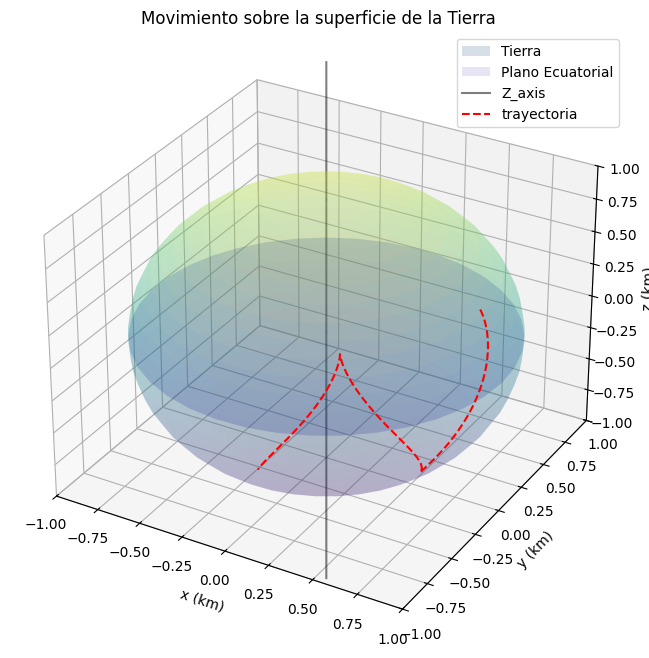

In [147]:
init_params = [np.pi/3, 0, 0, 0]

a = non_inertial_mot(init_params, 1000, 10, RT=1, omegaT=1, coords=True)